In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import preprocessing

In [2]:
data = pd.read_csv('crimes.csv')

In [3]:
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,53,30,23,8,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,59,34,25,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,25,20,5,1,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,49,26,23,4,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,2,2,0,0,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,17,14,3,5,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [5]:
df1=data.drop(['DISTRICT','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'BURGLARY',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'],axis=1)

In [6]:
df1.columns

Index(['STATE/UT', 'YEAR', 'MURDER', 'ROBBERY', 'THEFT', 'DOWRY DEATHS',
       'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
df1.isna().all()

STATE/UT            False
YEAR                False
MURDER              False
ROBBERY             False
THEFT               False
DOWRY DEATHS        False
TOTAL IPC CRIMES    False
dtype: bool

In [8]:
df=df1.rename(columns={'TOTAL IPC CRIMES':'IPC CRIMES'})

In [9]:
df=df1.rename(columns={'STATE/UT':'STATE'})

In [10]:
label_encoder = preprocessing.LabelEncoder()
df['STATE'] = label_encoder.fit_transform(df['STATE'])

In [11]:
df.rename(columns={'TOTAL IPC CRIMES':'IPC CRIMES'})

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,IPC CRIMES
0,1,2001,101,41,199,16,4154
1,1,2001,151,16,366,7,4125
2,1,2001,101,14,723,14,5818
3,1,2001,80,4,173,17,3140
4,1,2001,82,25,1021,12,6507
...,...,...,...,...,...,...,...
9012,18,2012,0,0,7,0,60
9013,18,2012,0,0,7,0,60
9014,26,2012,5,3,81,0,787
9015,26,2012,24,13,577,0,3494


In [12]:
df

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,TOTAL IPC CRIMES
0,1,2001,101,41,199,16,4154
1,1,2001,151,16,366,7,4125
2,1,2001,101,14,723,14,5818
3,1,2001,80,4,173,17,3140
4,1,2001,82,25,1021,12,6507
...,...,...,...,...,...,...,...
9012,18,2012,0,0,7,0,60
9013,18,2012,0,0,7,0,60
9014,26,2012,5,3,81,0,787
9015,26,2012,24,13,577,0,3494


In [13]:
df.head()

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,TOTAL IPC CRIMES
0,1,2001,101,41,199,16,4154
1,1,2001,151,16,366,7,4125
2,1,2001,101,14,723,14,5818
3,1,2001,80,4,173,17,3140
4,1,2001,82,25,1021,12,6507


In [14]:
df.tail()

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,TOTAL IPC CRIMES
9012,18,2012,0,0,7,0,60
9013,18,2012,0,0,7,0,60
9014,26,2012,5,3,81,0,787
9015,26,2012,24,13,577,0,3494
9016,26,2012,29,16,658,0,4281


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   STATE             9017 non-null   int32
 1   YEAR              9017 non-null   int64
 2   MURDER            9017 non-null   int64
 3   ROBBERY           9017 non-null   int64
 4   THEFT             9017 non-null   int64
 5   DOWRY DEATHS      9017 non-null   int64
 6   TOTAL IPC CRIMES  9017 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 458.0 KB


In [16]:
df.describe()

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,TOTAL IPC CRIMES
count,9017.000000,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000
mean,18.427637,2006.629034,89.28535,55.066430,776.428968,20.228901,5310.115116
std,10.237654,3.463623,327.27503,220.576876,2935.008640,96.970466,18524.381119
min,0.000000,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2004.000000,18.00000,6.000000,88.000000,1.000000,853.000000
50%,19.000000,2007.000000,38.00000,17.000000,217.000000,5.000000,2096.000000
75%,28.000000,2010.000000,66.00000,37.000000,466.000000,16.000000,3972.000000
max,34.000000,2012.000000,7601.00000,6949.000000,53449.000000,2322.000000,220335.000000


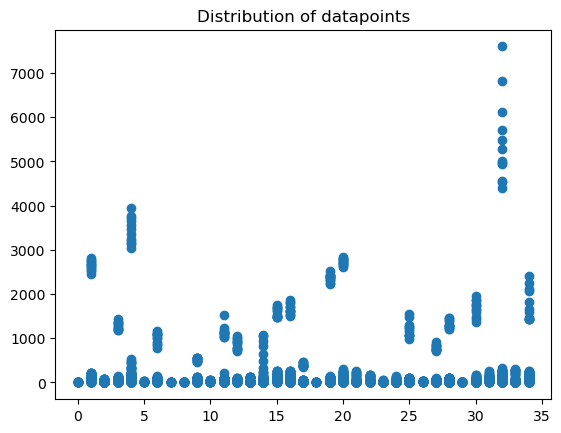

In [17]:
#scatter plot
plt.scatter(df.STATE,df.MURDER)
plt.title("Distribution of datapoints")
plt.show()

<Axes: xlabel='STATE', ylabel='MURDER'>

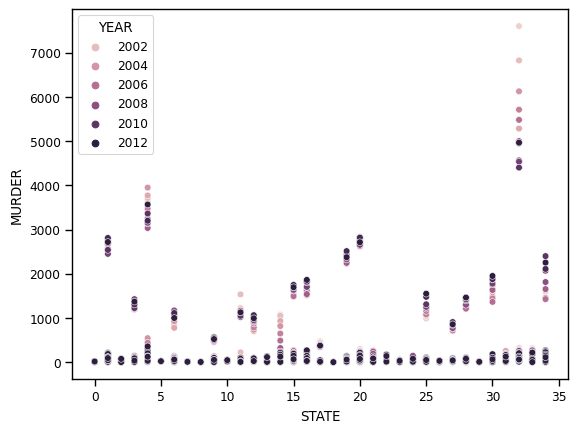

In [18]:
sns.set_context("paper")
sns.scatterplot(x='STATE',y='MURDER',data=df,hue='YEAR')

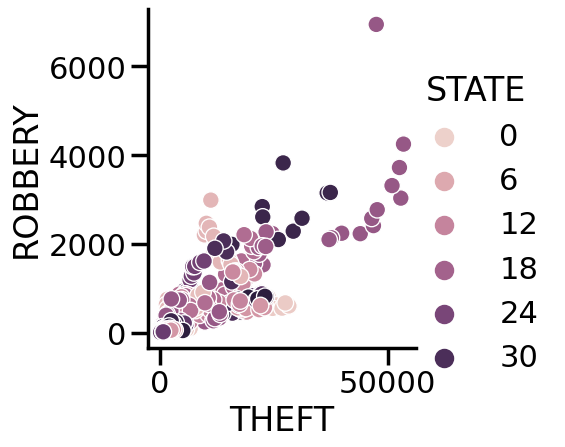

In [19]:
#Generate relation ship plot between Age and Estimated Salary based on gender
sns.set_context("poster")
sns.relplot(data=df,x="THEFT",y="ROBBERY",hue="STATE")

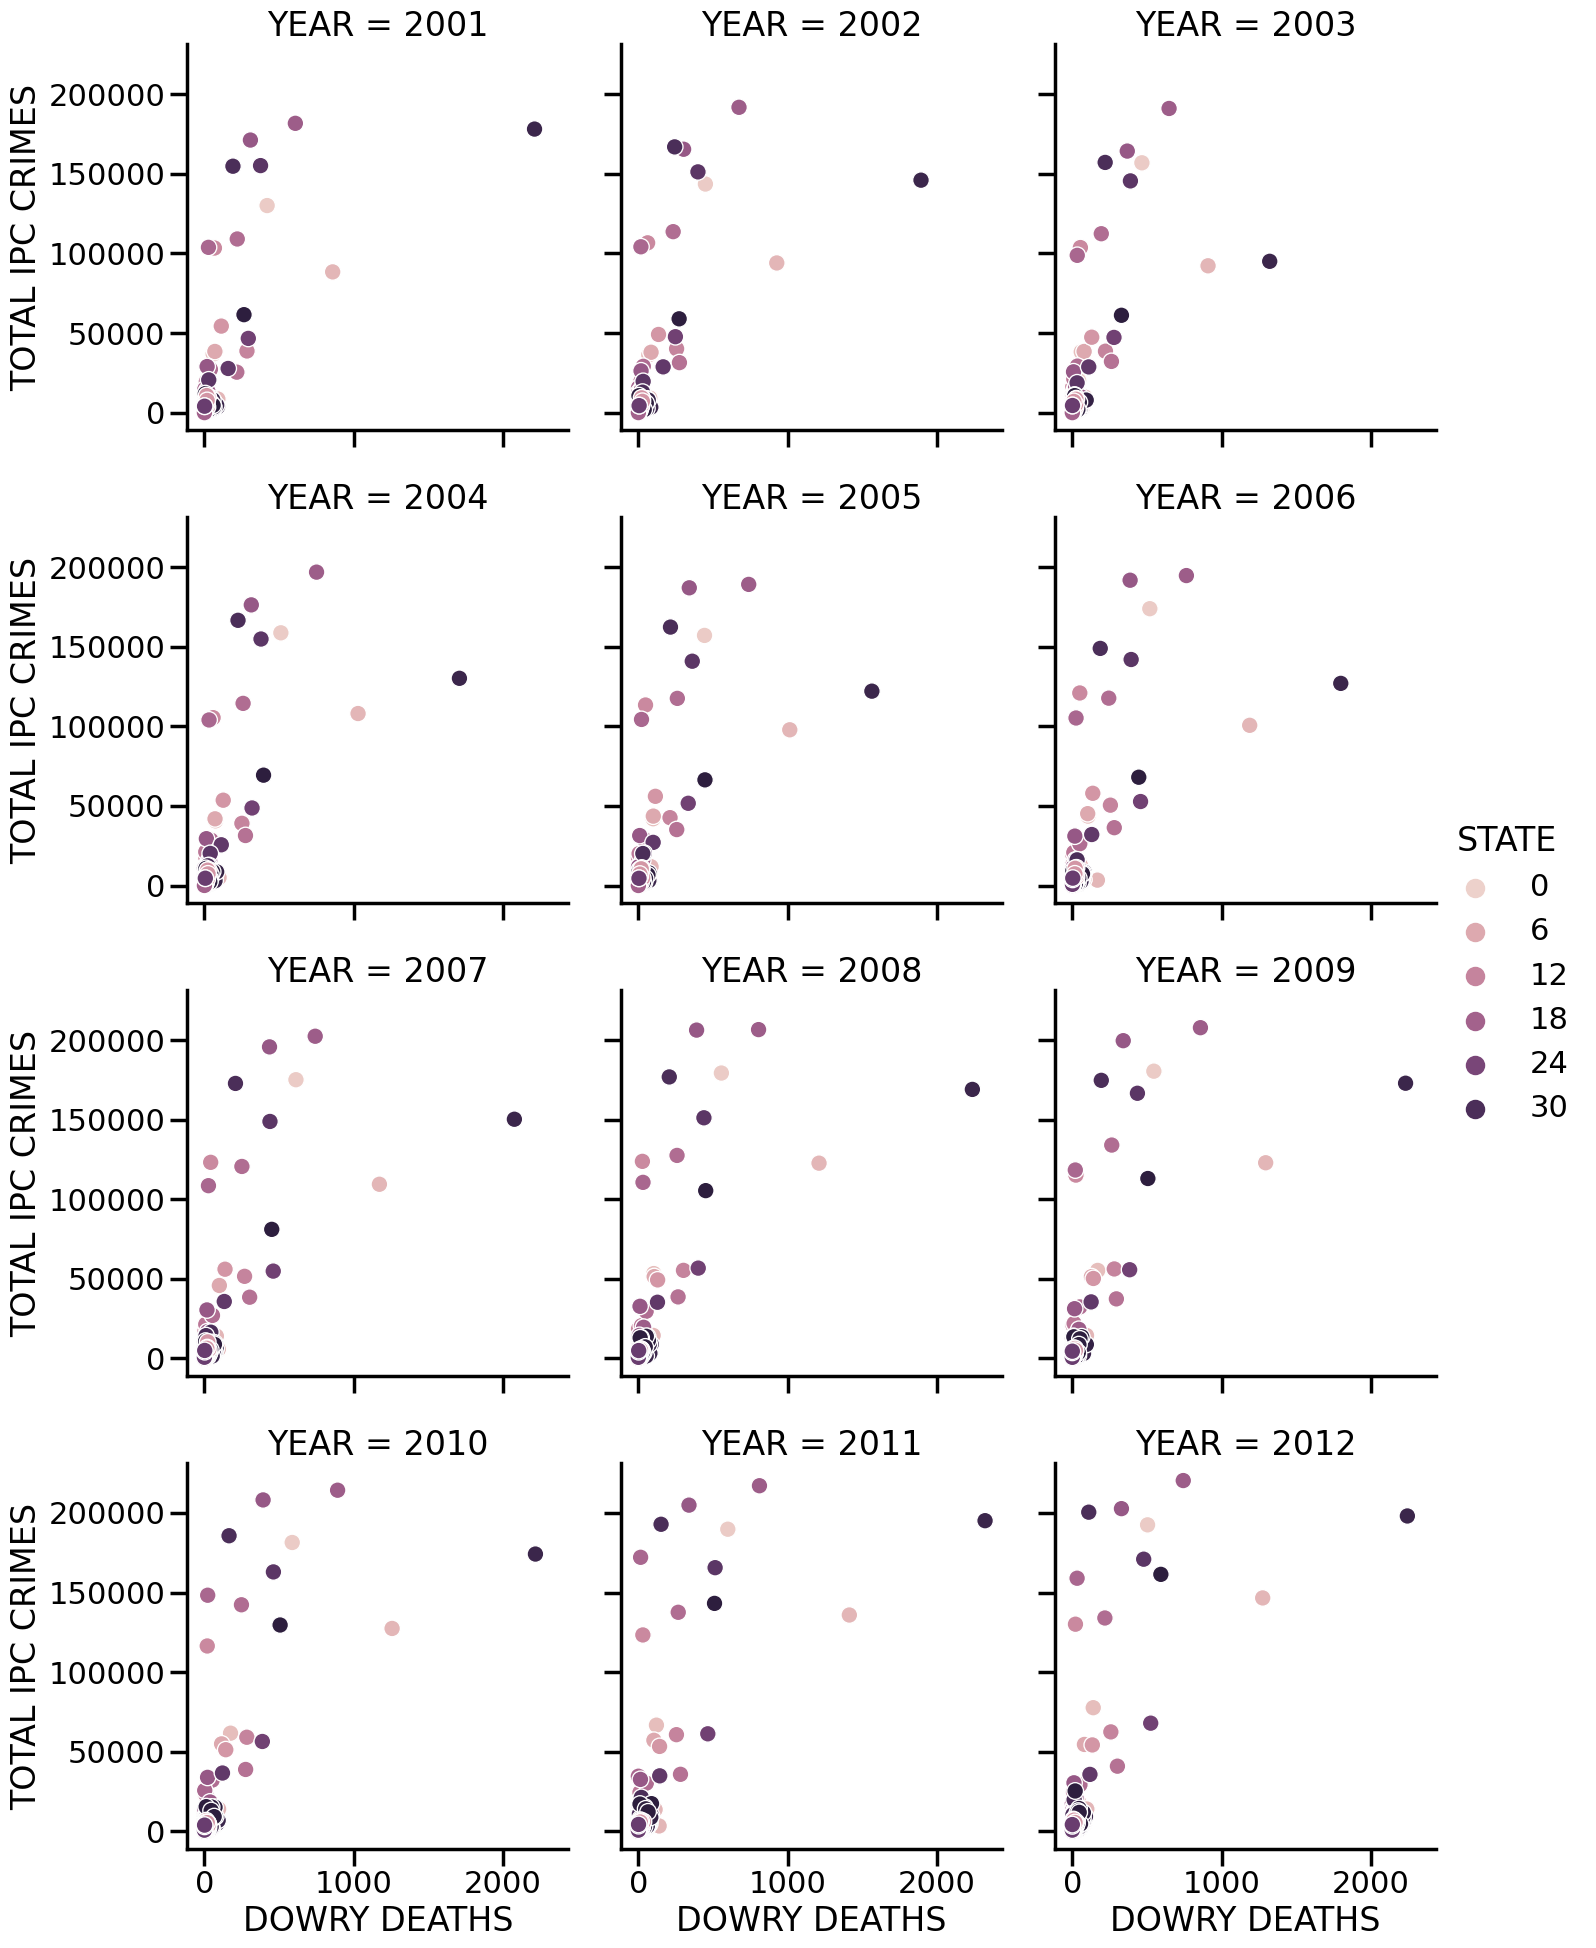

In [20]:
sns.set_context("poster")
sns.relplot(data=df,x="DOWRY DEATHS",y="TOTAL IPC CRIMES",hue="STATE",col="YEAR",col_wrap=3)

C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

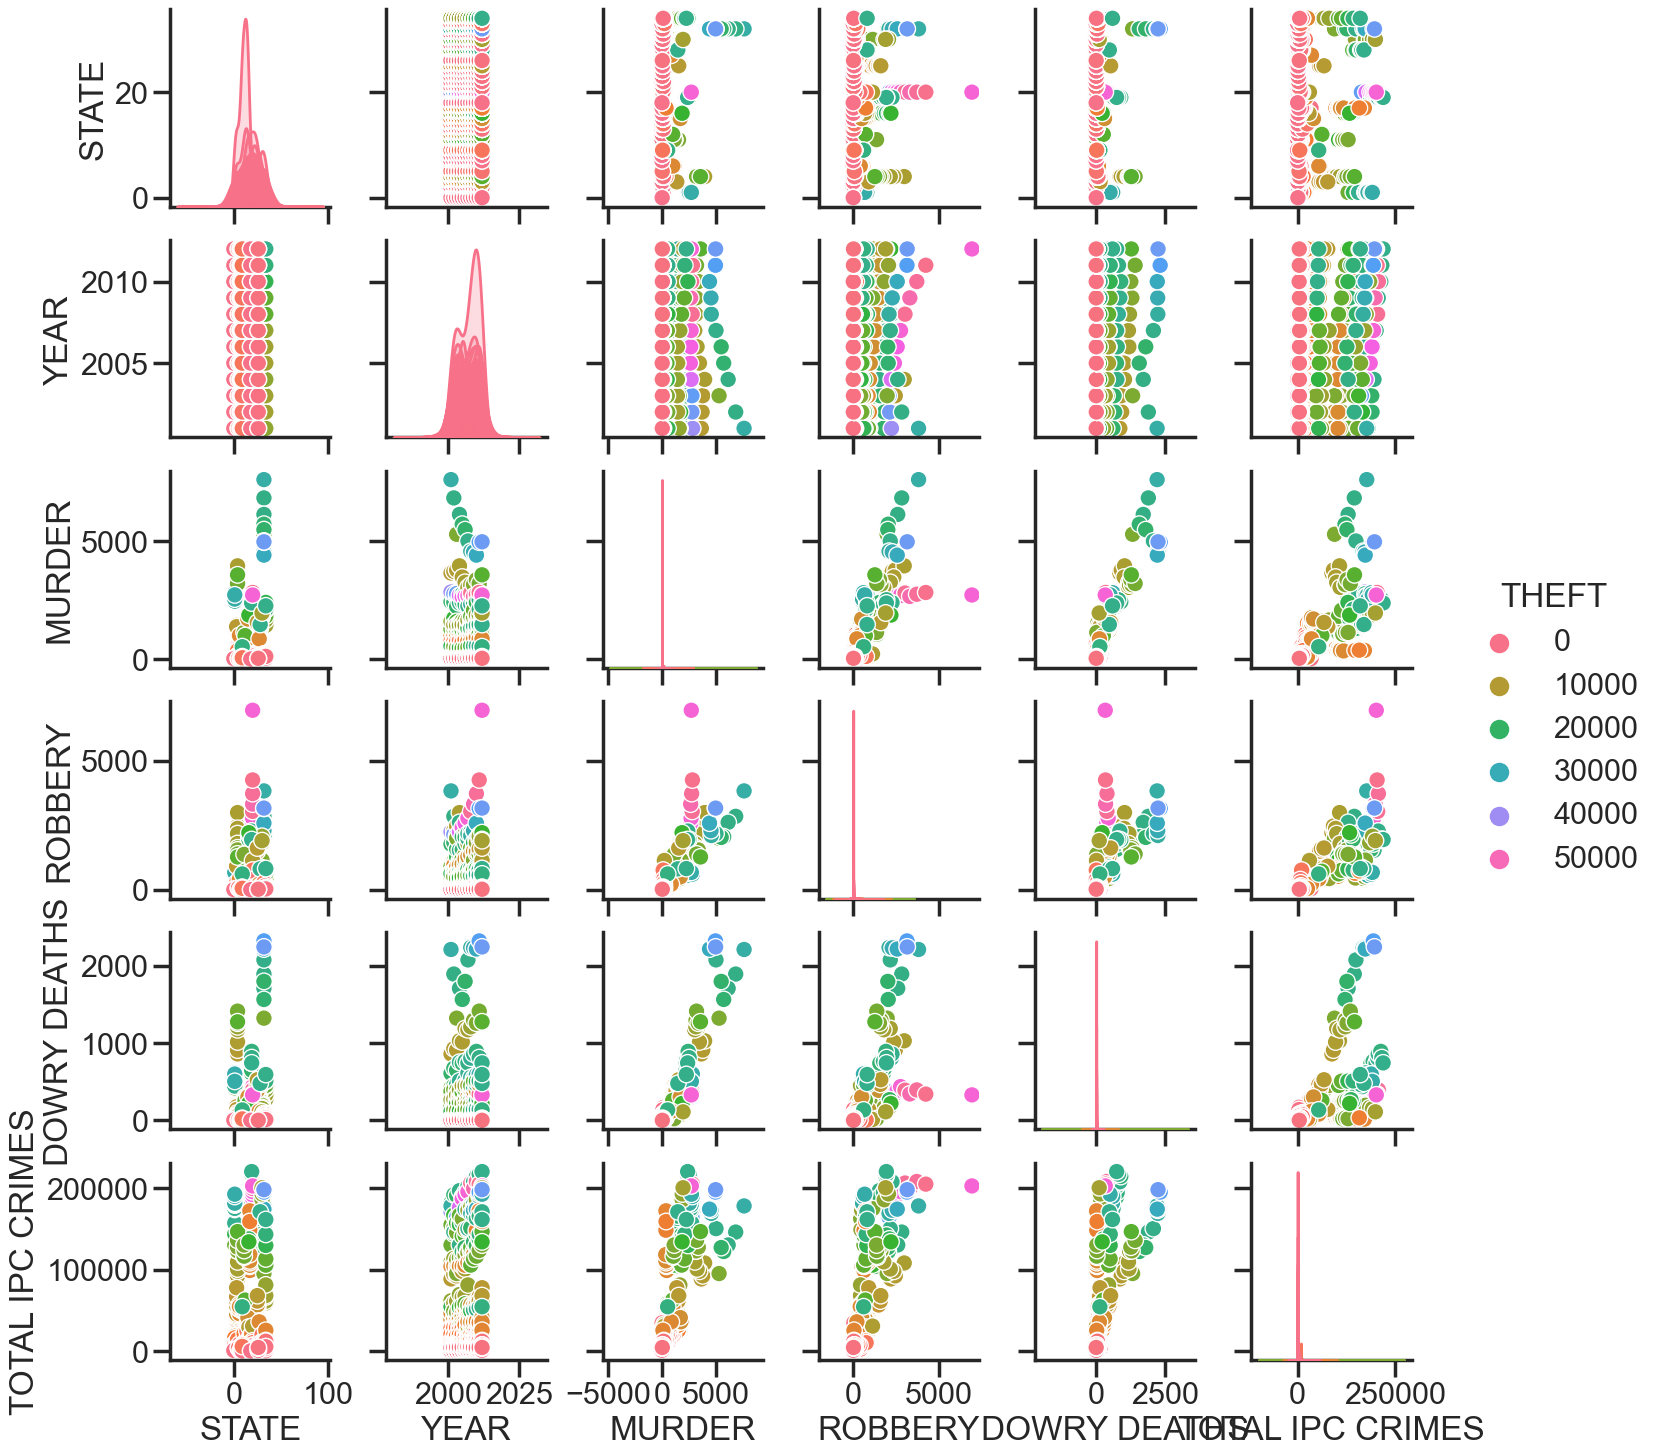

In [21]:
#pair plot
sns.set_style("ticks")
sns.pairplot(df,hue = "THEFT",diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

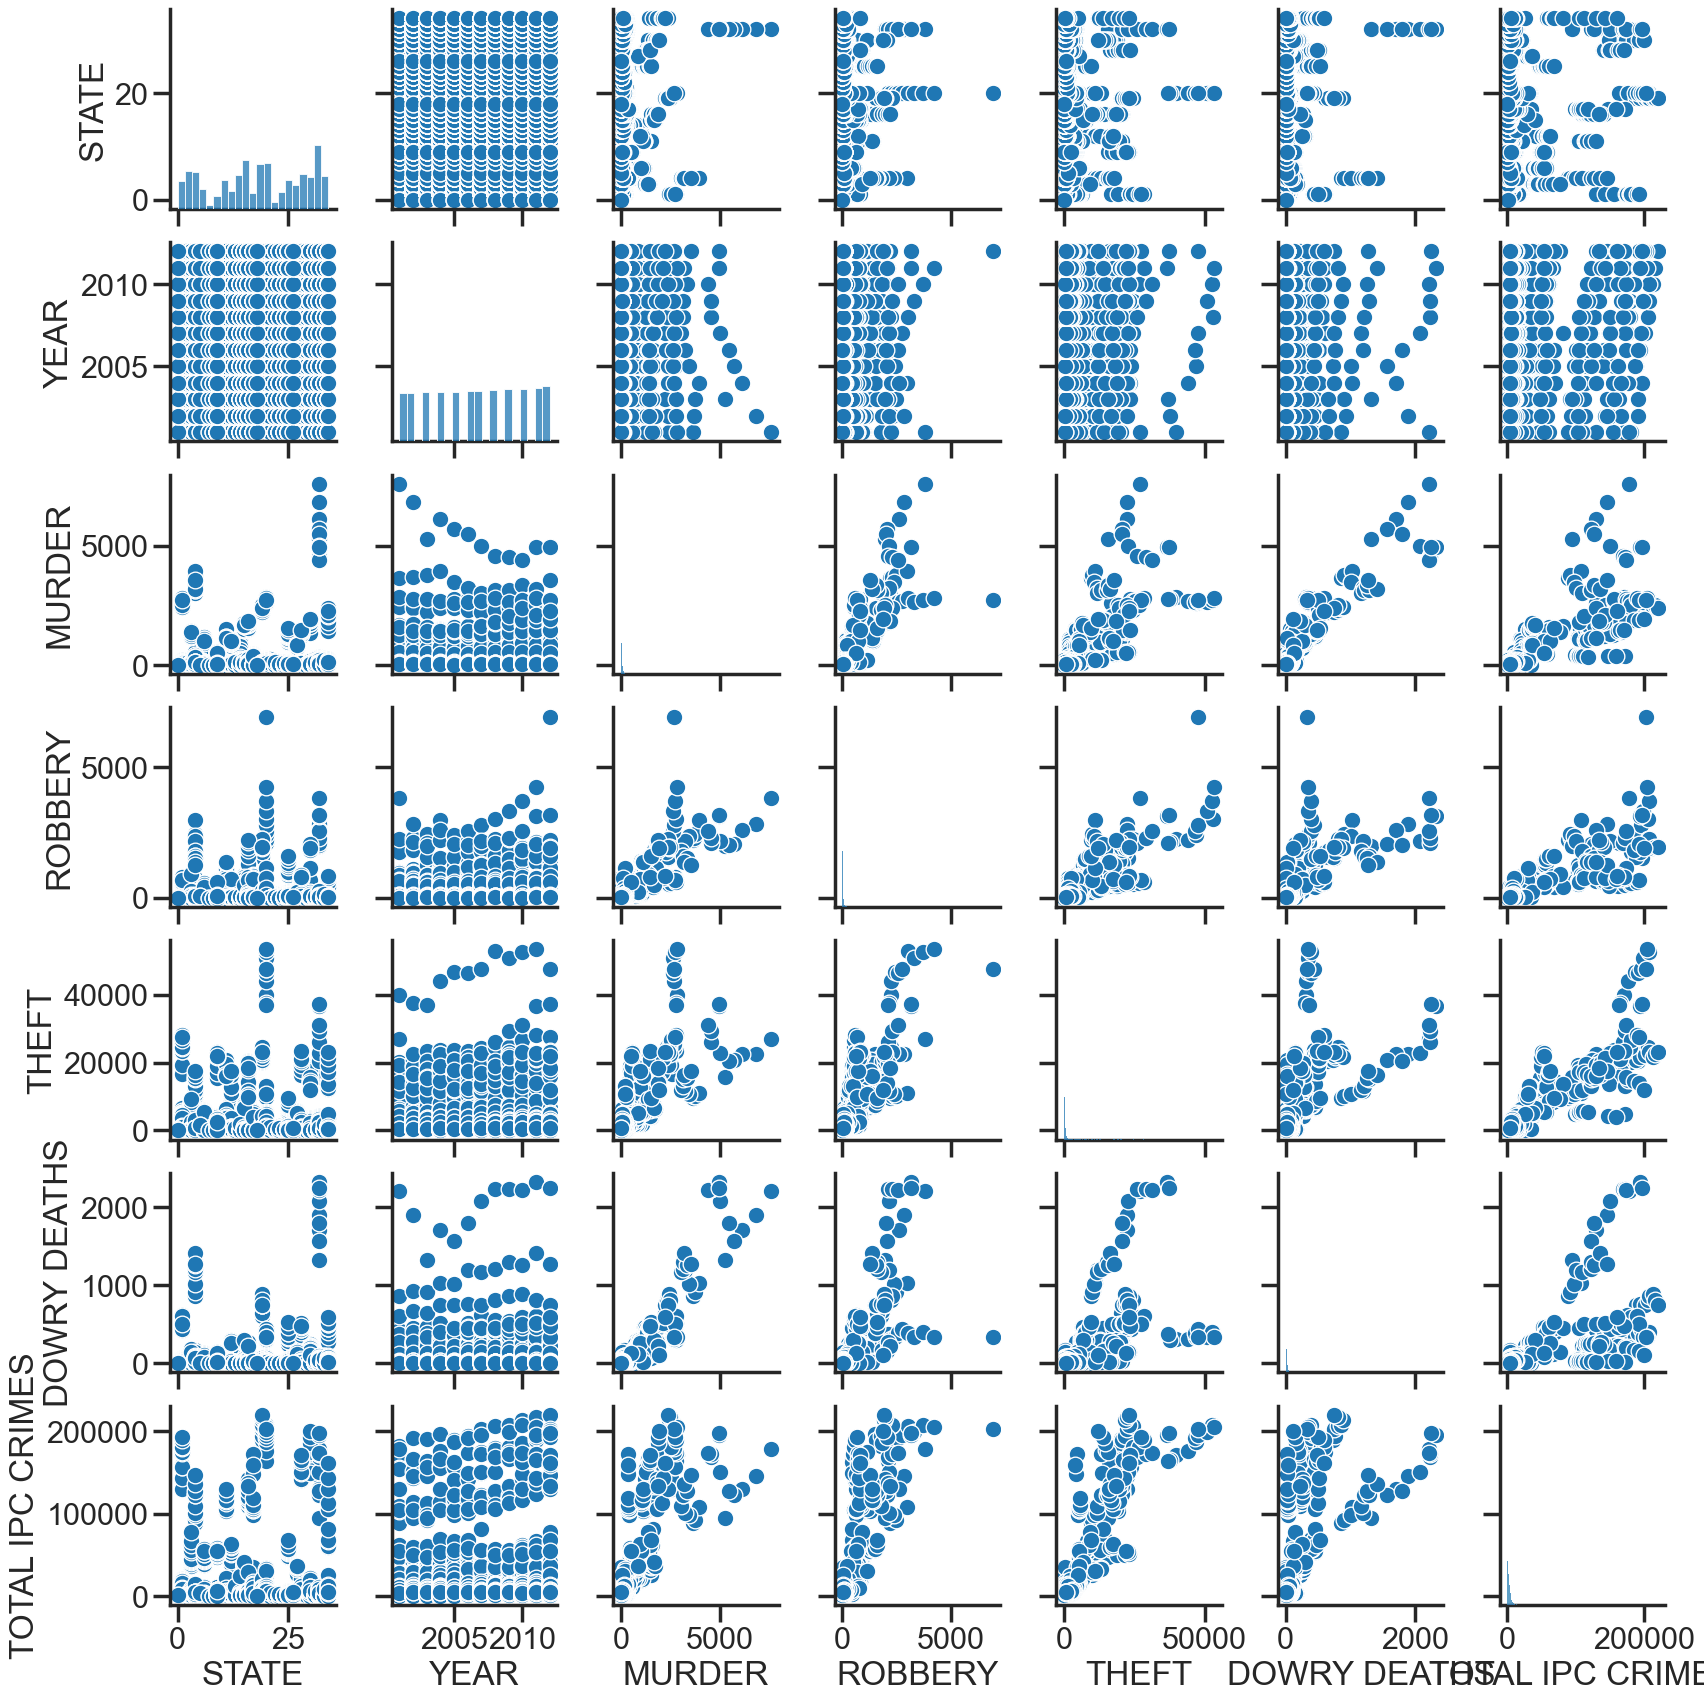

In [22]:
sns.pairplot(df)

In [23]:
extraval=df
extraval.head()

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,TOTAL IPC CRIMES
0,1,2001,101,41,199,16,4154
1,1,2001,151,16,366,7,4125
2,1,2001,101,14,723,14,5818
3,1,2001,80,4,173,17,3140
4,1,2001,82,25,1021,12,6507


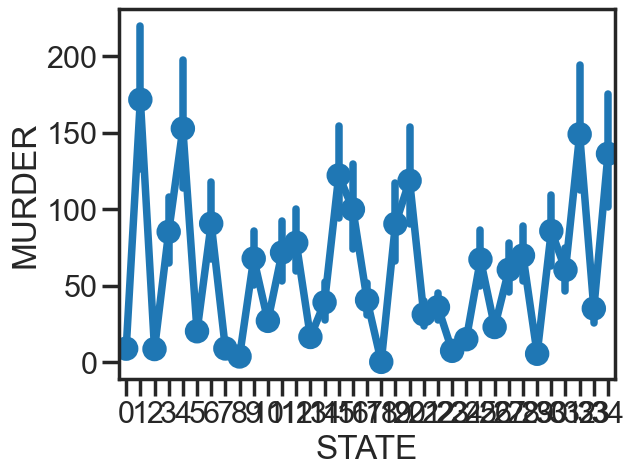

In [24]:
sns.pointplot(x="STATE",y="MURDER",data=extraval)
plt.show()

C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SMITHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


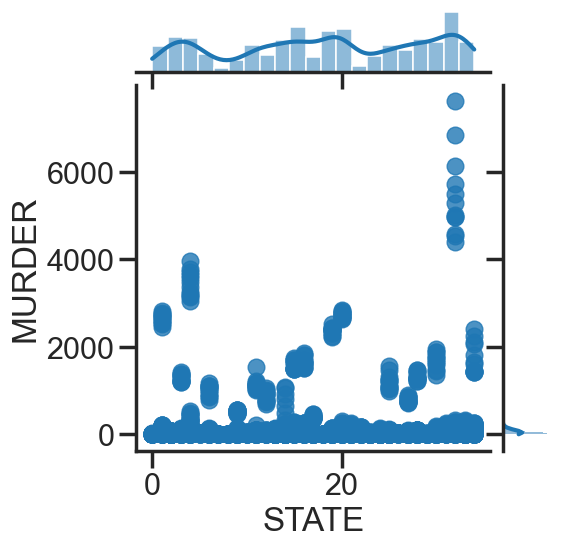

In [25]:
sns.jointplot(x='STATE',y='MURDER',data=df,kind='reg')

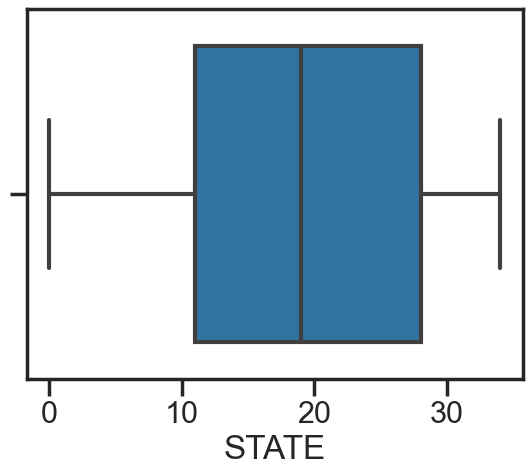

In [26]:
ax=sns.boxplot(x=df['STATE'])

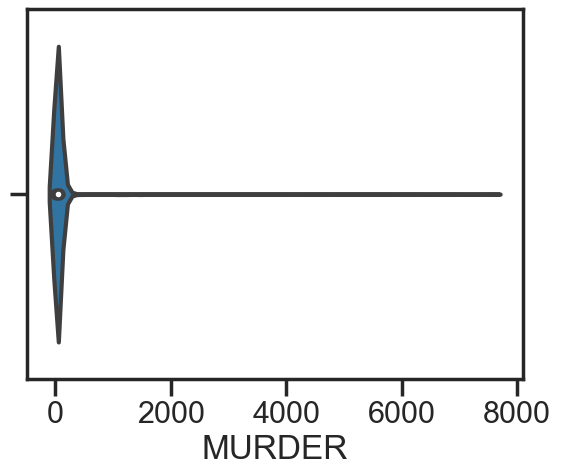

In [27]:
ax=sns.violinplot(x=df['MURDER'])

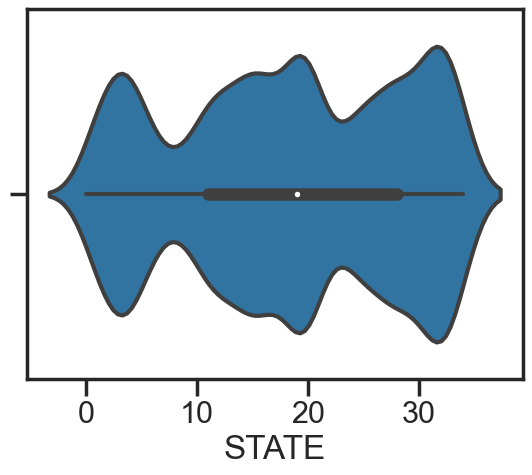

In [28]:
ax=sns.violinplot(x=df['STATE'])

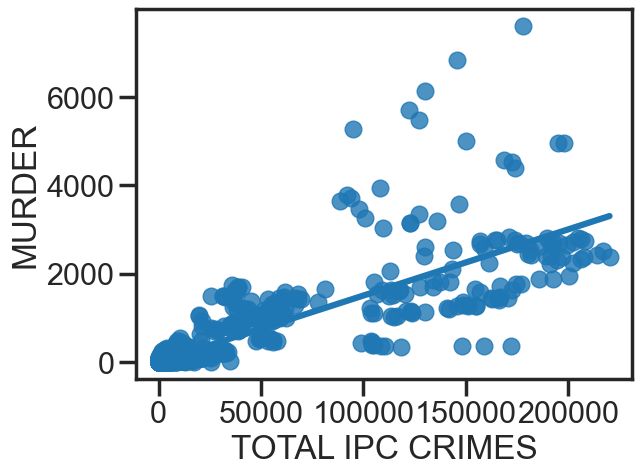

In [29]:
ax=sns.regplot(x='TOTAL IPC CRIMES',y='MURDER',data=df,ci=None)

array([[<Axes: title={'center': 'STATE'}>,
        <Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MURDER'}>],
       [<Axes: title={'center': 'ROBBERY'}>,
        <Axes: title={'center': 'THEFT'}>,
        <Axes: title={'center': 'DOWRY DEATHS'}>],
       [<Axes: title={'center': 'TOTAL IPC CRIMES'}>, <Axes: >, <Axes: >]],
      dtype=object)

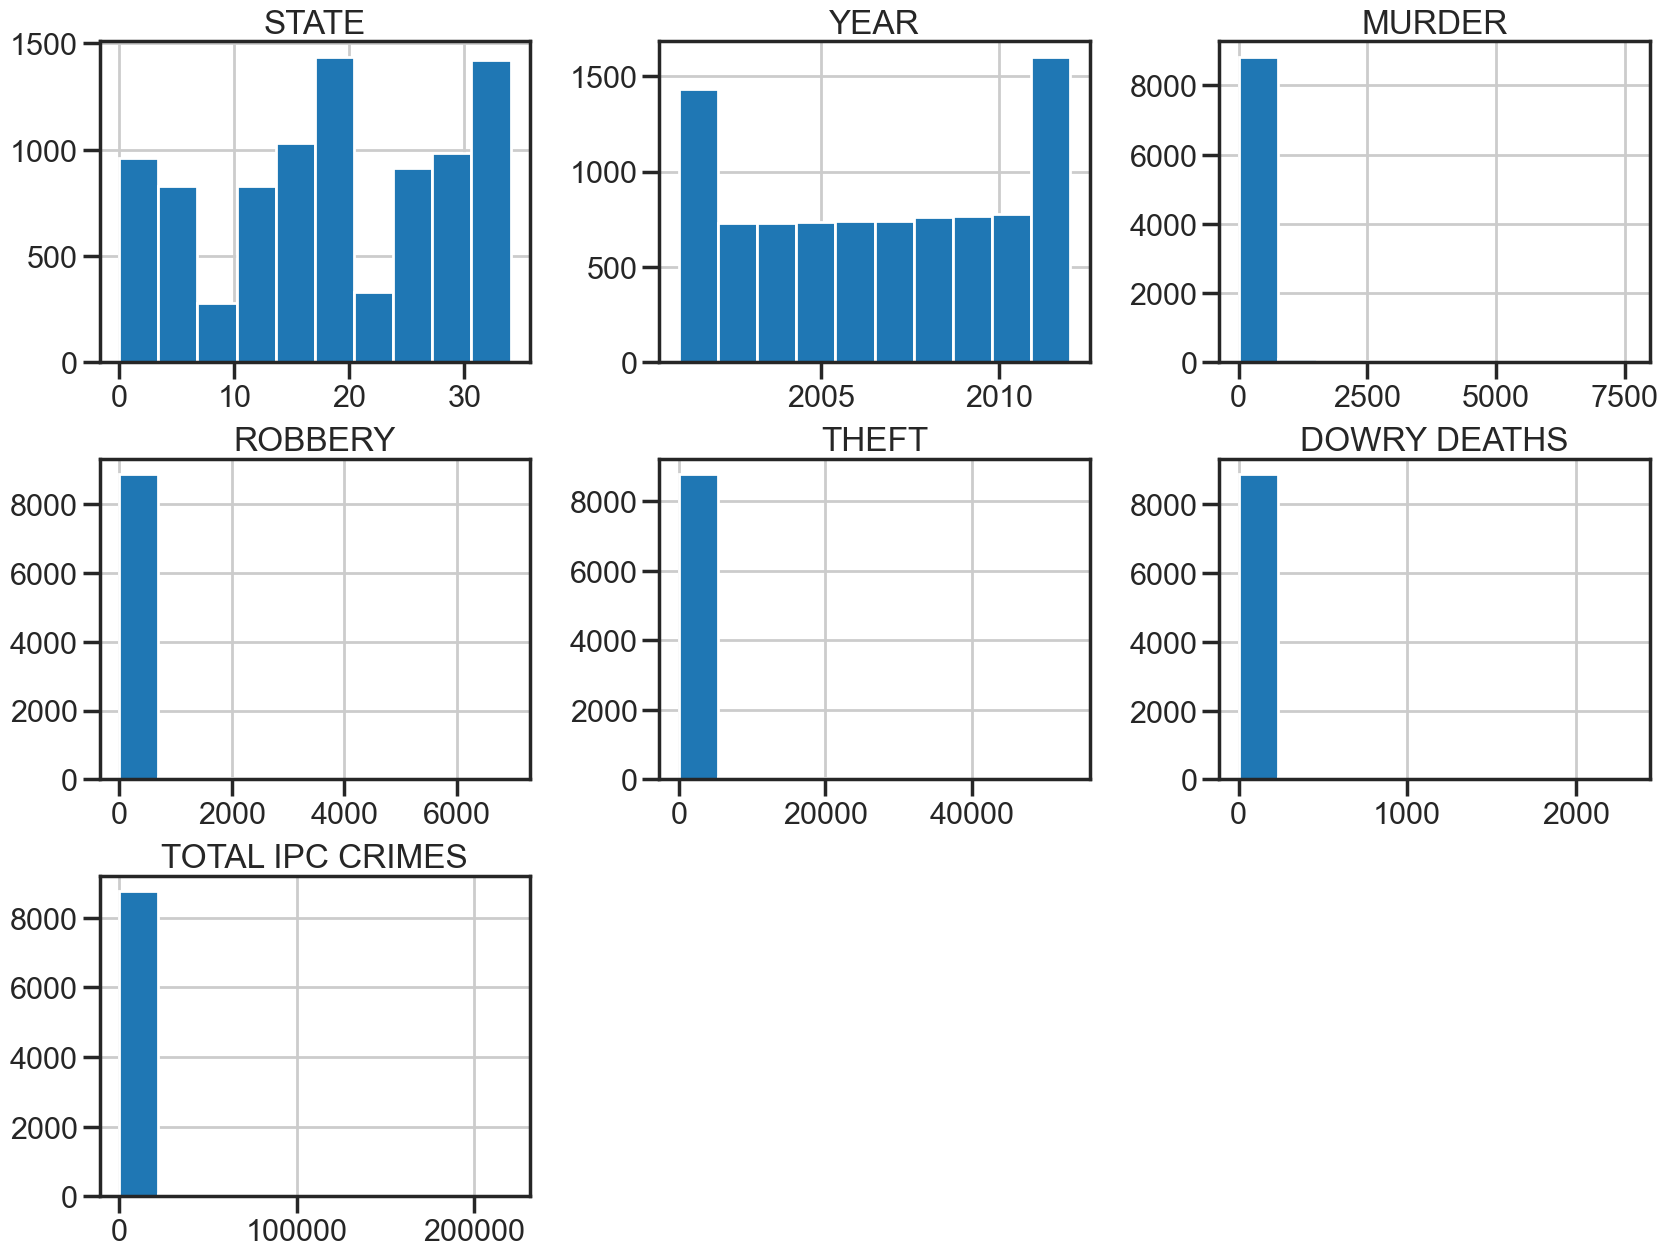

In [30]:
df.hist(alpha=1.0,figsize=(20,15))

In [31]:
correlation=df.corr()
df.corr()

,STATE,YEAR,MURDER,ROBBERY,THEFT,DOWRY DEATHS,TOTAL IPC CRIMES
STATE,1.000000,-0.005635,-0.000691,0.001106,-0.009275,0.034559,-0.002005
YEAR,-0.005635,1.000000,-0.013119,0.020523,0.020296,0.011401,0.019805
MURDER,-0.000691,-0.013119,1.000000,0.860930,0.813205,0.910127,0.846449
ROBBERY,0.001106,0.020523,0.860930,1.000000,0.866241,0.743107,0.842383
THEFT,-0.009275,0.020296,0.813205,0.866241,1.000000,0.665427,0.910790
DOWRY DEATHS,0.034559,0.011401,0.910127,0.743107,0.665427,1.000000,0.704394
TOTAL IPC CRIMES,-0.002005,0.019805,0.846449,0.842383,0.910790,0.704394,1.000000


<Axes: >

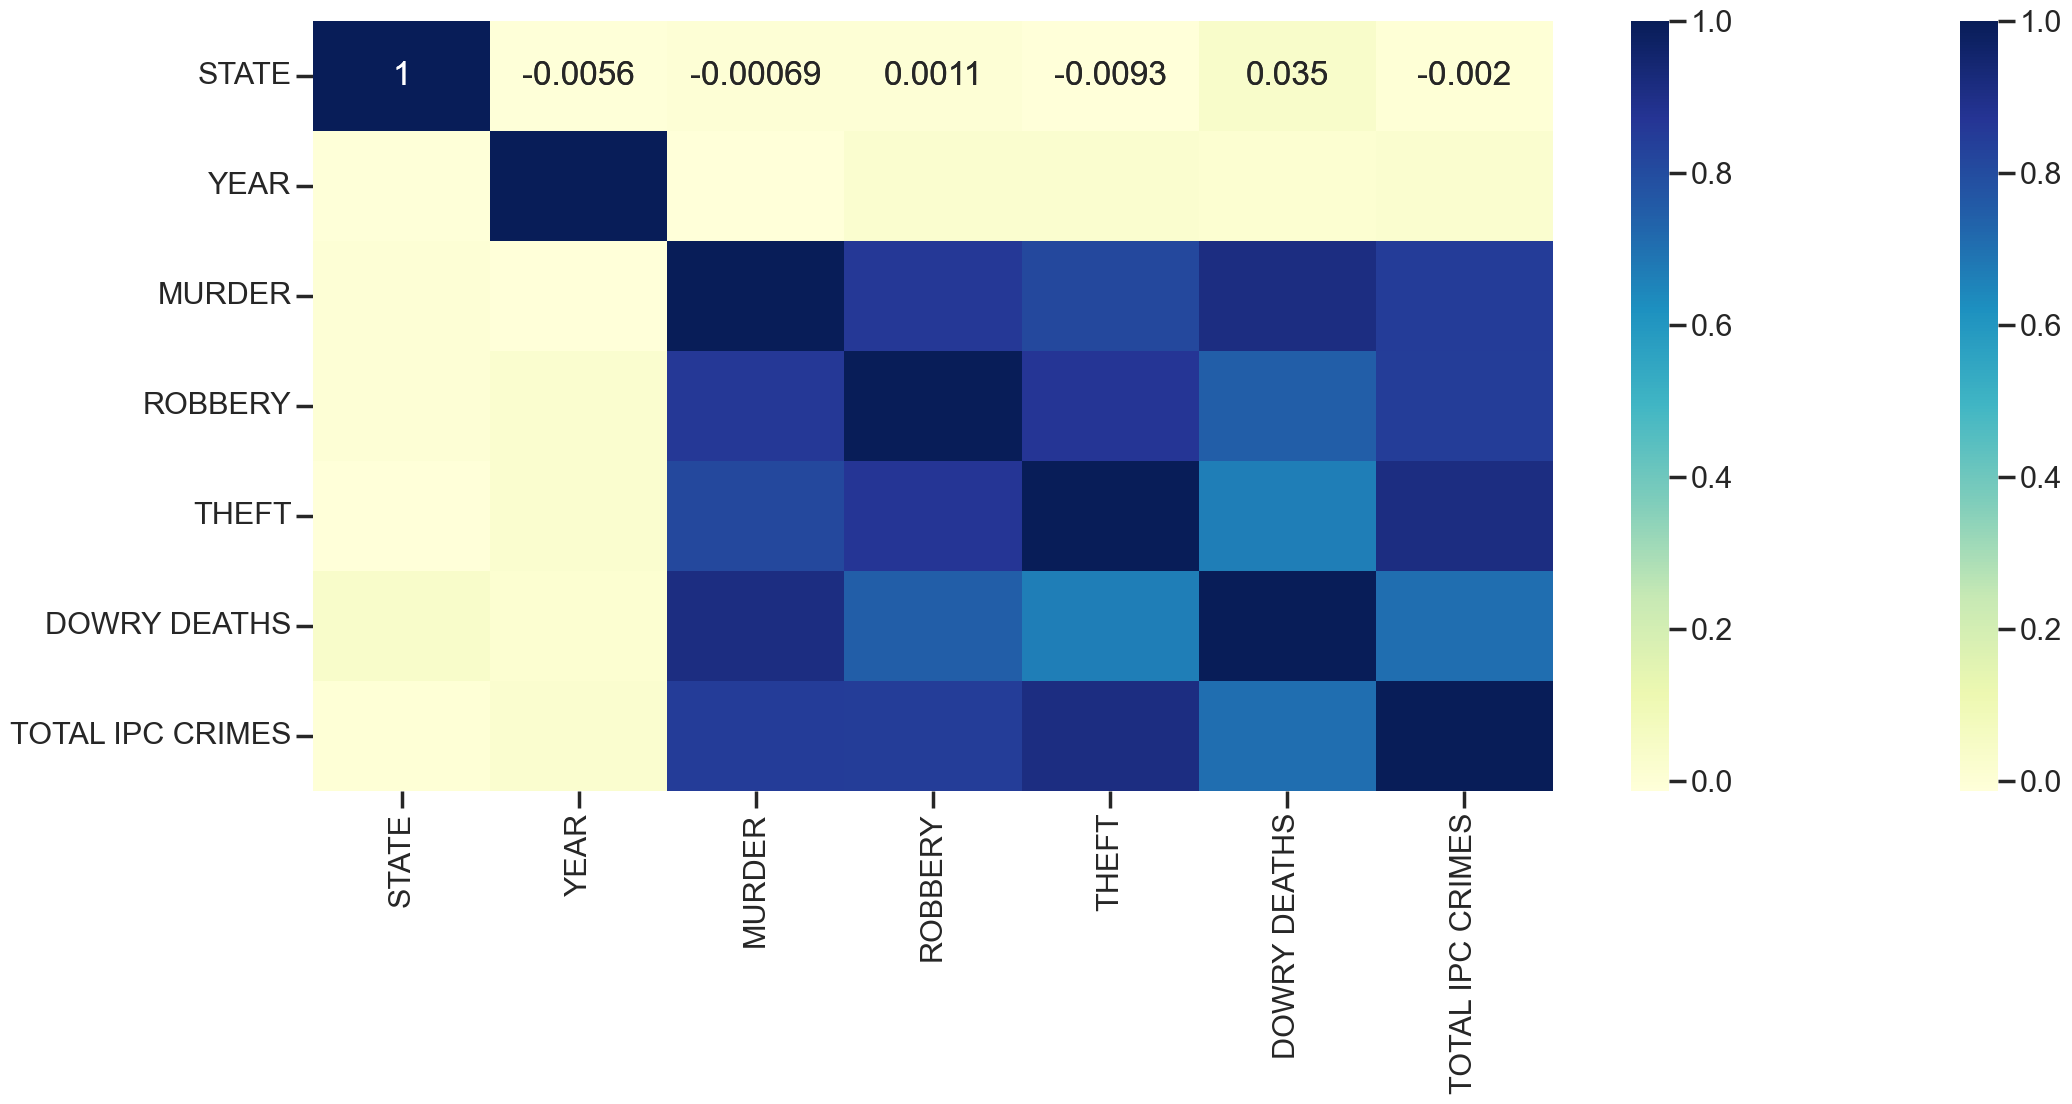

In [32]:
corr=df.corr()
plt.subplots(figsize=(25,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap="YlGnBu")
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap="YlGnBu")

<Axes: xlabel='YEAR', ylabel='TOTAL IPC CRIMES'>

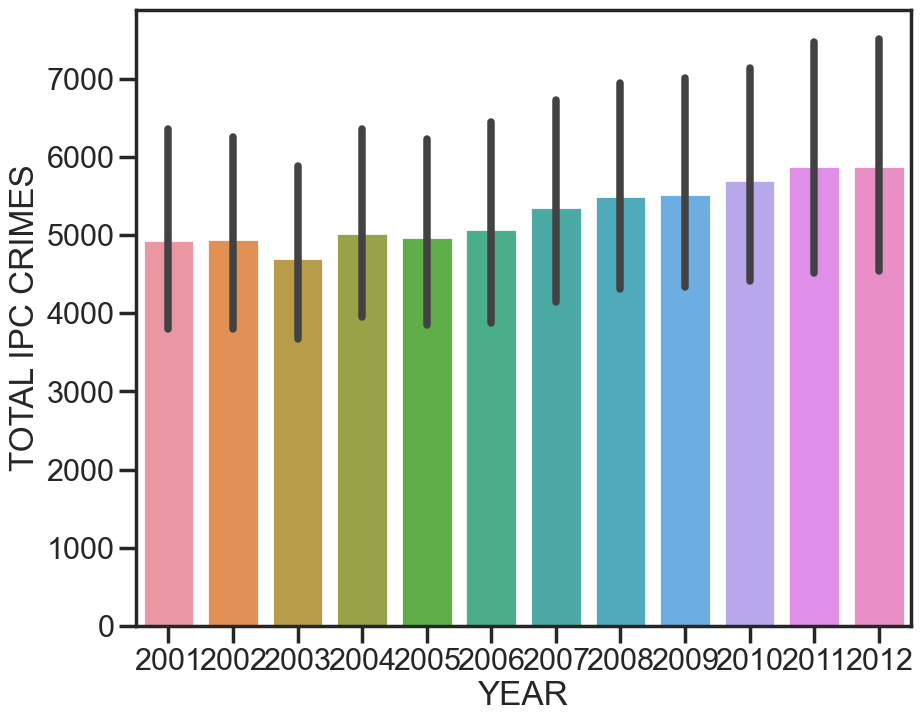

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x='YEAR',y='TOTAL IPC CRIMES',data=df)

In [34]:
#Assigning feature and target variables
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
#setting values for x and y 
X=df[['YEAR','MURDER','ROBBERY','THEFT','DOWRY DEATHS','TOTAL IPC CRIMES']]
y=df['STATE']

In [36]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
#intercept and coefficient
print("Intercept: ",lr.intercept_)
print("Coefficients:")
list(zip(X,lr.coef_))

Intercept:  111.96588278904173
Coefficients:


[('YEAR', -0.046600211239240935),
 ('MURDER', -0.008474221316757784),
 ('ROBBERY', 0.0017966732022331995),
 ('THEFT', -5.9255939798877e-05),
 ('DOWRY DEATHS', 0.024354440171677854),
 ('TOTAL IPC CRIMES', 2.622182907034184e-05)]

In [39]:
#prediction of test set
y_pred_lr=lr.predict(X_test)
#predicted values
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [18.24273594 19.08456208 19.55484585 ... 18.58264362 18.20969468
 18.65702903]


In [40]:
#actual values and the predicted value
lr_diff=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7550,6,18.242736
2248,4,19.084562
4828,25,19.554846
2126,34,18.379828
5216,4,18.768364


Text(0.5, 1.0, 'Actual vs Predicted')

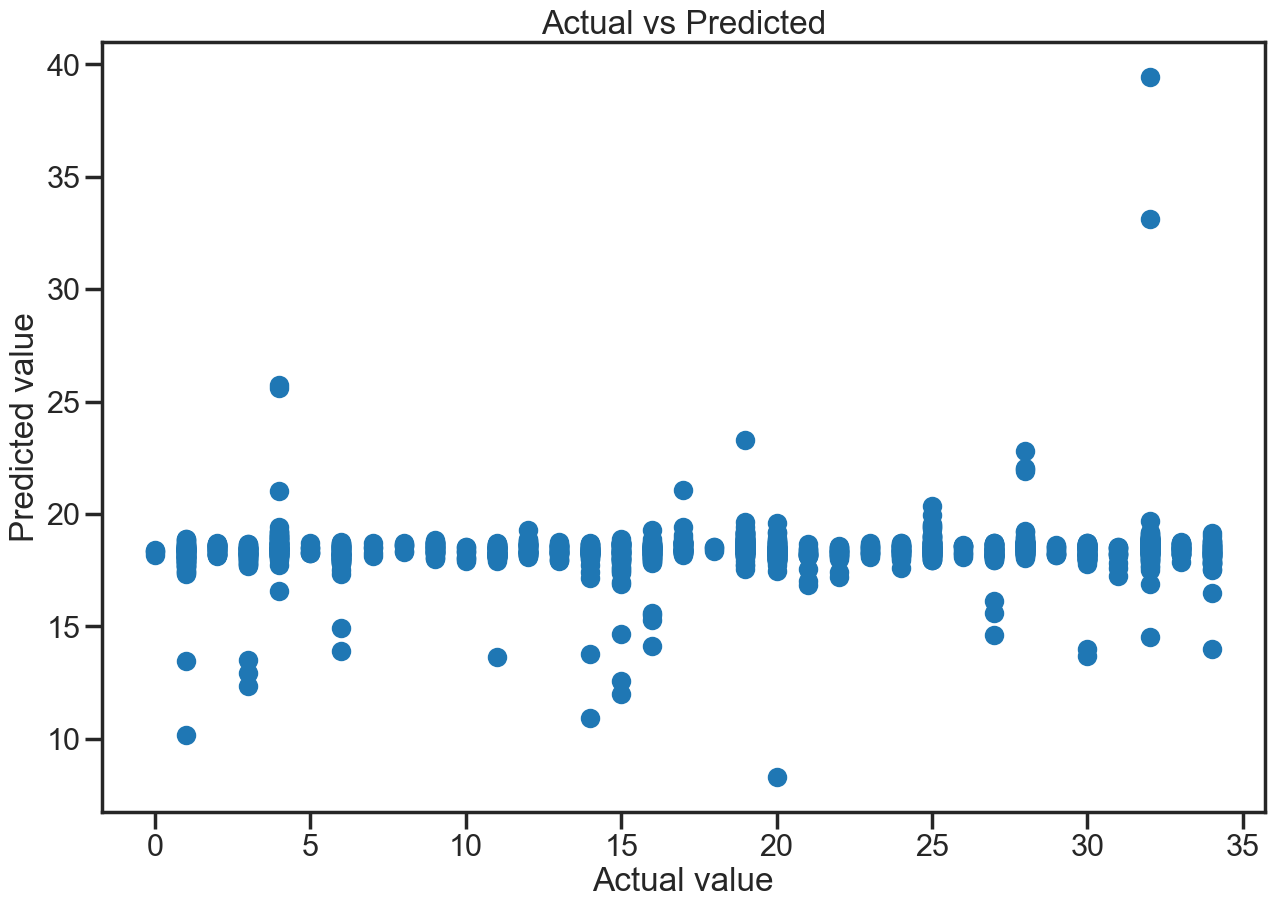

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

In [42]:
y_pred_test = lr.predict(X_test)

In [43]:
#model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#r2 = r2_score(y_test, y_pred_test)
accuracy = lr.score(X_test, y_test)
print('Accuracy:', accuracy)
meanAbErr=metrics.mean_absolute_error(y_test,y_pred_lr)
meanSqErr=metrics.mean_squared_error(y_test,y_pred_lr)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr))
#print(f"Accuracy: {r2:.4f}")
print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print('Mean Absolute Error:',meanAbErr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

Accuracy: 0.006844615680342447
R squared: 0.82
Mean Absolute Error: 8.604904684879504
Mean Square Error: 102.62611334506596
Root Mean Square Error: 10.130454745225704


<Axes: xlabel='YEAR', ylabel='STATE'>

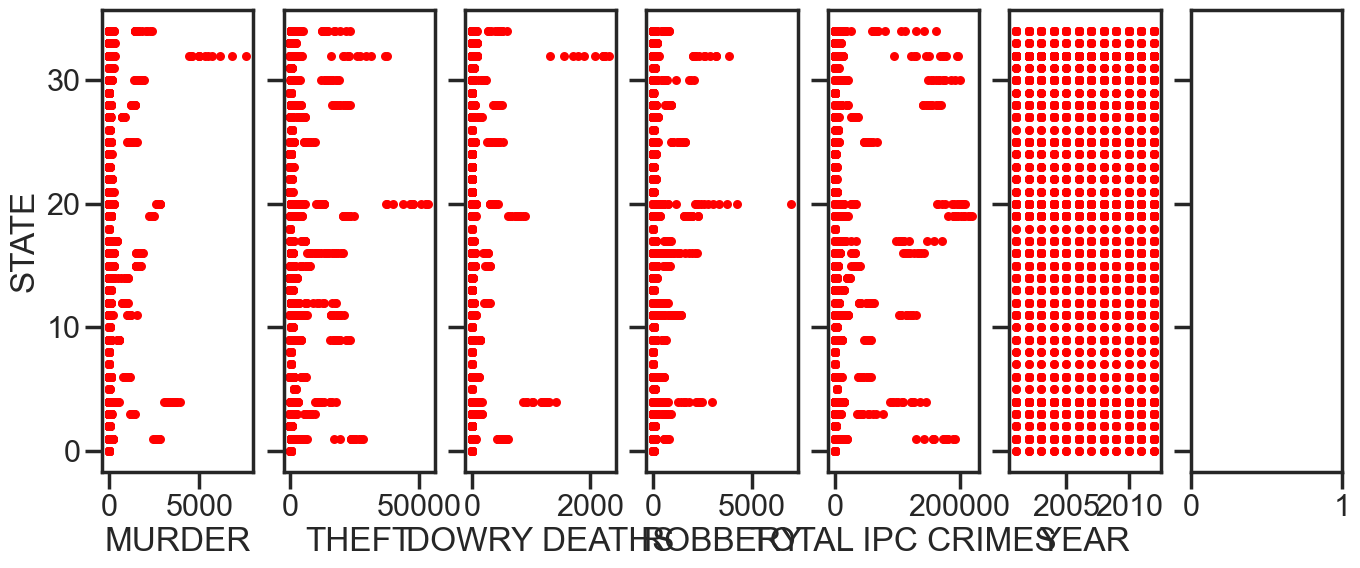

In [44]:
# model training and testing
data=df
fig,axis=plt.subplots(1,7,sharey=True)
data.plot(kind='scatter',x='MURDER',y='STATE',ax=axis[0],color='red',figsize=(16,6))
data.plot(kind='scatter',x='THEFT',y='STATE',ax=axis[1],color='red',figsize=(16,6))
data.plot(kind='scatter',x='DOWRY DEATHS',y='STATE',ax=axis[2],color='red',figsize=(16,6))
data.plot(kind='scatter',x='ROBBERY',y='STATE',ax=axis[3],color='red',figsize=(16,6))
data.plot(kind='scatter',x='TOTAL IPC CRIMES',y='STATE',ax=axis[4],color='red',figsize=(16,6))
data.plot(kind='scatter',x='YEAR',y='STATE',ax=axis[5],color='red',figsize=(16,6))

In [45]:
# creating and training knn model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [47]:
knn.score(X_test,y_test)

0.32982261640798227

In [48]:
knn.score(X_train,y_train)

0.4552890614168862

In [49]:
X = data.drop('STATE', axis=1)  # Features
y = data['STATE']  # Target variable

In [50]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Training the KNN model
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [53]:
# Making predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

In [54]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.37416851441241683


In [55]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.3691568325337097


In [56]:
#creating and training decision tree model

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [58]:
X = data.drop('STATE', axis=1)  # Features
y = data['STATE']  # Target variable

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [62]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4750554323725055


In [63]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted') 
print('F1 Score:', f1)

F1 Score: 0.4753936922674089


In [64]:
#creating and training random forest model

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred=rfc.predict(X_test)

In [67]:
rfc.score(X_test,y_test)

0.6186252771618626

In [68]:
rfc.score(X_train,y_train)

0.99986136143075

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6186252771618626


In [70]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted') 
print('F1 Score:', f1)

F1 Score: 0.6138756337685436


In [71]:
# Gradient boosting

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [73]:
X = data[['MURDER', 'THEFT', 'DOWRY DEATHS','TOTAL IPC CRIMES']]
y = data['STATE']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
clf= GradientBoostingClassifier()

In [76]:
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [77]:
y_pred = clf.predict(X_test)

In [78]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust 'average' parameter as needed
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 0.5027716186252772
F1 Score: 0.4966118548517854


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming the dataset has features such as demographic data, socioeconomic factors, etc., and a target variable (crime rate)
# This is just a placeholder, you'll need to replace it with your actual dataset
# X represents features, y represents target variable
X = np.array([[0, 1, 0], [1, 0, 1], [1, 1, 0], [0, 1, 1]])  # Sample features
y = np.array([0, 1, 1, 0])  # Sample target variable (0 for low crime rate, 1 for high crime rate)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Now you can use this trained model for predicting crime rates for new data.
# For prediction, you will use clf.predict(new_data) where new_data is your new dataset.


Accuracy: 1.0
